<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [23]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import spacy
import seaborn as sns
from spacy.tokenizer import Tokenizer
from bs4 import BeautifulSoup
from sklearn.neighbors import NearestNeighbors

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [8]:
df = pd.read_csv('./data/job_listings.csv')
print(df.shape)
df.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use Spacy to tokenize / clean the listings 

In [4]:
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [9]:
def remove_html_unicode(df):

    df['description'] = df['description'].apply(lambda x: BeautifulSoup(x).get_text()[2:].replace('\\n', ' '))
    
    df['description'] = df['description'].str.replace(r'\\(x|n)[a-z0-9]{0,2}', '')
    
    return df
df = remove_html_unicode(df)

In [10]:
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):

    doc_tokens = []

    for token in doc: 
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens
    
df['tokens']    

0      [job, requirements:, conceptual, understanding...
1      [job, description,  , data, scientist, 1,, hel...
2      [data, scientist, working, consulting, busines...
3      [$4,969, $6,756, monthcontractunder, general, ...
4      [location:, usa,  , multiple, locations, 2+, y...
5      [create, business, intelligence, analytical, r...
6      [spotify, premium, swells, 96m, subscribers, g...
7      [everytown, gun, safety,, nation's, largest, g...
8      [ms, quantitative, discipline, statistics,, ma...
9      [slack, hiring, experienced, data, scientists,...
10     [blackthorn, therapeutics, computational, scie...
11     [part-timeabout, opportunity, grubhub, weve, d...
12     [nfosys, data, analytics,  , sr., data, scient...
13     [spotify, premium, swells, 96m, subscribers, g...
14     [experience, guiding, r&d, strategy, organizat...
15     [atlantic, seeking, data, scientist, help, lea...
16     [challenge, eventbrite, big,, bustling, market...
17     [contractwe, looking, hi

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [15]:
vect = CountVectorizer(stop_words='english', min_df = 0.03, max_df= 0.90)

vect.fit(df['description'])

dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(),columns = vect.get_feature_names())
dtm.head()

,000,10,100,12,20,2019,25,3rd,40,401,...,worldwide,write,writing,written,www,year,years,york,youll,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## 4) Visualize the most common word counts

C:\Users\John\Anaconda3\envs\DS-U4-S1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


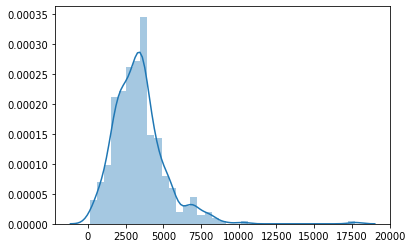

In [18]:
doc_len = [len(doc) for doc in df['description']]
sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]

vect = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.95, ngram_range=(1,2))

sparse = vect.fit_transform(df['description'])

dtm = pd.DataFrame(sparse.todense(), columns=vect.get_feature_names())


dtm.head()

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [26]:
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [27]:
ideal = ['''
Data Scientist position focused on a mix of data engineering and data analysis/machine learning projects. Requires a Bachelor's Degree and one year of experience.
''']

new = vect.transform(ideal)

nn.kneighbors(new.todense())

(array([[1.24352842, 1.24352842, 1.26115618, 1.2714054 , 1.2826386 ]]),
 array([[126, 174, 114, 338, 250]], dtype=int64))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 